<a href="https://colab.research.google.com/github/trodman201/Data-2000-/blob/homework/Final_Rodman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-2000 Final Exam

## Grading Rubric

This final will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Model Building: 25 points
    - 15 points will be awarded for the actual model building (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 25 points
    - 5 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 10 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not

## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

# Image Classification: Horse or Human


For this exercise, we are going to use a dataset of images of both horses and humans, taken from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/horses_or_humans).

Our dataset contains 1,027 training images (300x300 pixels in full color) and 256 testing images, as well as a category label for each image.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [ ]:
X_train, y_train = tfds.load(
    'horses_or_humans',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)
X_test, y_test = tfds.load(
    'horses_or_humans',
    split='test',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteSIBRFF/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteSIBRFF/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


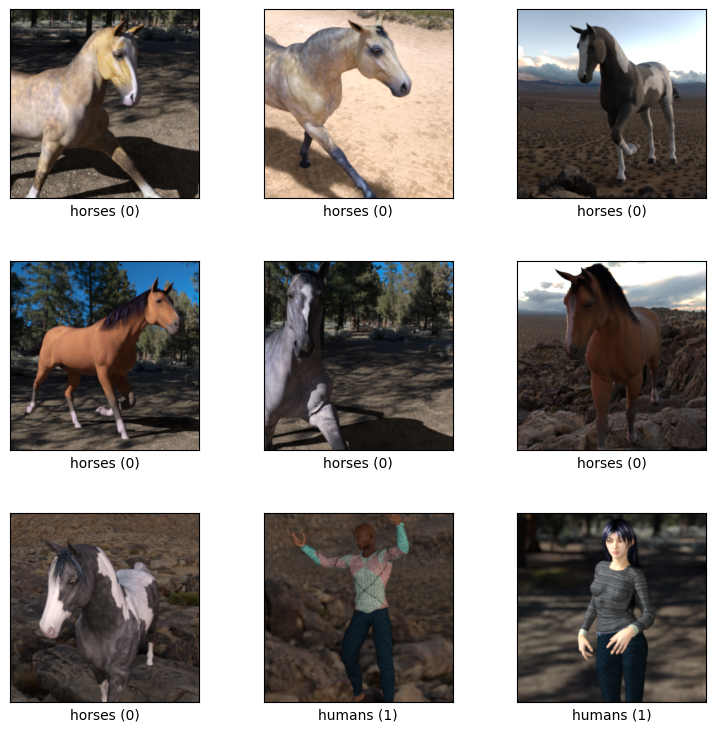

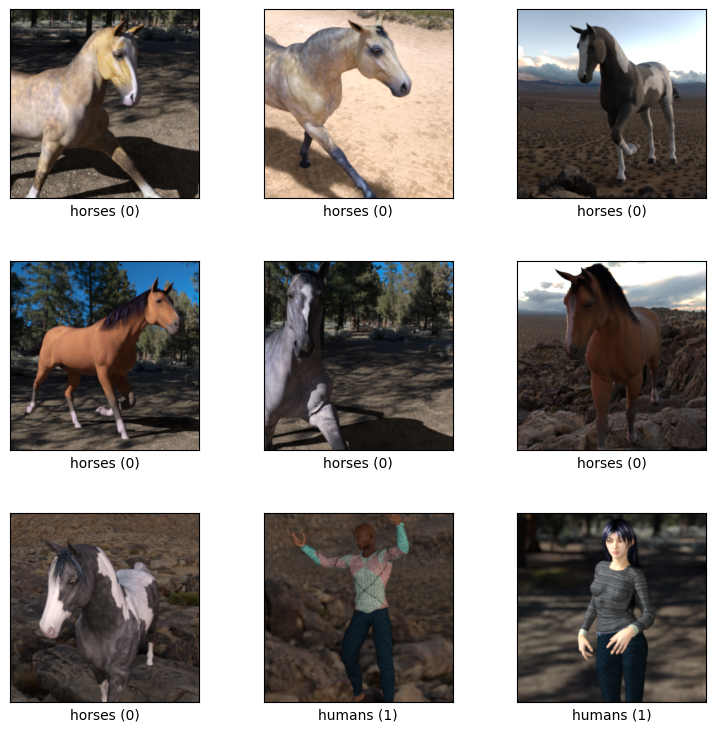

In [ ]:
viz_data, ds_info = tfds.load(
    'horses_or_humans',
    split='train[:10]',
    shuffle_files=True,
    with_info=True)
tfds.visualization.show_examples(viz_data, ds_info)

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [15]:
(ds_train, ds_test), ds_info = tfds.load(
    'horses_or_humans',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

ds_train = ds_train.shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

 The preprocess function resizes each image to a consistent size of 150x150 pixels, and converts the pixel values to numbers between 0 and 1 to make computations easier for the network, and ensures all images are of the same data type. After that, I organized the training and testing data into batches of 32 images each and shuffle the training set so that it would be easier to see. Also I decided to prefetch the data, so its ready in the background so that it's readily available when the neural network needs it. I think it would make the training process faster and more efficient.

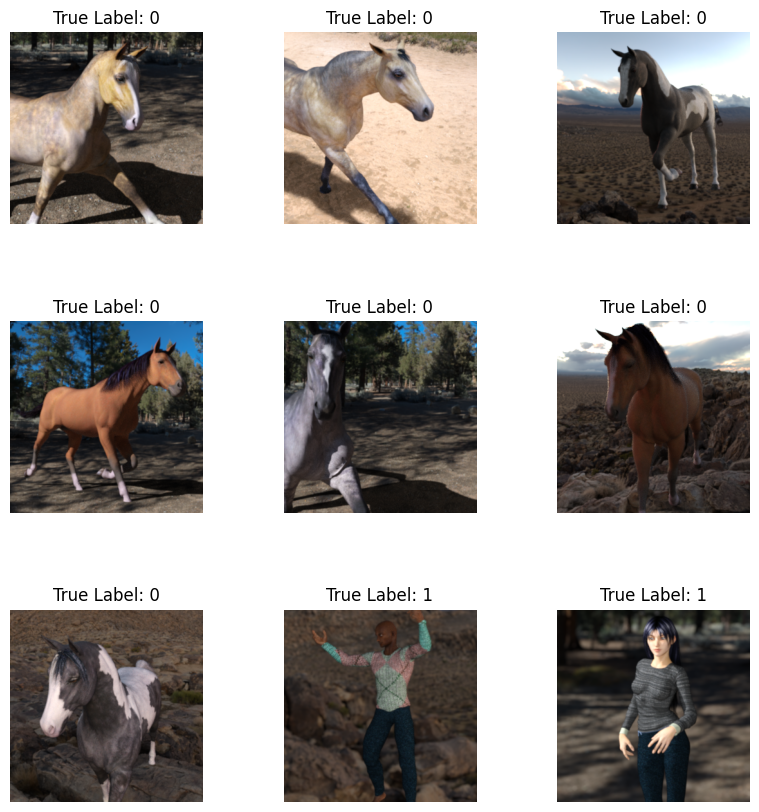

In [33]:

dataset = tfds.load("horses_or_humans", split='train[:9]', as_supervised=True)

#Extract images and labels
data_sample = list(dataset.take(9))

#Plot images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(data_sample):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(f"True Label: {label.numpy()}")
    plt.subplots_adjust(hspace=.5)
plt.show()


* Using list (dataset.take(9)), I extracted the first 9 image-label pairs and create a list called data_sample. Next, I created a Matplotlib figure with a 3x3 grid layout (9 subplots) to display the images.

* Inside the loop, for each image-label pair in data_sample, I plotted the image using plt.imshow(image), turned off the axis with plt.axis('off'), and set the image's true label as the subplot's title using plt.title(f"True Label: {label.numpy()}"). The plt.subplots_adjust(hspace=.5) command adds some space between subplots for better visualization.  

* Plt.show() displays the grid of images with their respective true labels. The labels are dichotomus since we are categorizing the pictures as either horse or human, with human being 1 and horse being 0.




In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


* The sequential increase in filter depth across the layers allows the model to progressively learn intricate features! I used max-pooling layers to reduce spatial dimensions.
* For the densely connected layers  I think the 512-neuron layer provides capacity for learning high-level representations to make classification more efficient.   
* I thought the ReLU activation introduced non-linearity efficiently and addressed the vanishing gradient issue. I also felt like the final sigmoid activation facilitates clear binary classification predictions which is also why it would be a good choice to use.  
* I decided to resize the images to 150x150 pixels to make balance between computational complexity and image detail. I also used 3x3 filters so that local pattern capturing could be possible with reduced parameters.








In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* I thought the 'adam' optimizer would be good for its learning rate and efficient handling of large datasets, since it also enables quicker convergence and robust performance without demanding extensive hyperparameter tuning.

* I also decided to use the 'binary_crossentropy' loss function to  measure the divergence between predicted and actual class probabilities, which enables the model to make accurate distinctions between the two classes.   

* I also decied to use accuracy as the evaluation metric since it is straightforward and commonly used for classification! It provides a clear measure of the model's predictive performance in correctly identifying if an image has a horse or a human.







In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [18]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
33/33 [==============================] - 35s 957ms/step - loss: 0.4361 - accuracy: 0.7692 - val_loss: 1.0395 - val_accuracy: 0.8281
Epoch 2/10
33/33 [==============================] - 34s 922ms/step - loss: 0.1451 - accuracy: 0.9513 - val_loss: 0.7836 - val_accuracy: 0.8359
Epoch 3/10
33/33 [==============================] - 33s 945ms/step - loss: 0.0567 - accuracy: 0.9766 - val_loss: 2.3500 - val_accuracy: 0.7734
Epoch 4/10
33/33 [==============================] - 37s 1s/step - loss: 0.0183 - accuracy: 0.9932 - val_loss: 1.9785 - val_accuracy: 0.8359
Epoch 5/10
33/33 [==============================] - 34s 930ms/step - loss: 0.0264 - accuracy: 0.9873 - val_loss: 1.0868 - val_accuracy: 0.8750
Epoch 6/10
33/33 [==============================] - 43s 1s/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 1.3384 - val_accuracy: 0.8711
Epoch 7/10
33/33 [==============================] - 34s 960ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1177 - val_accuracy: 0.8398
Epoch

* Across 10 epochs, the model shows promising signs of learning from the training data, reducing the training loss from 0.4361 to 0.2425 and increasing training accuracy from 0.7692 to 0.9163.
* the validation loss peaking at epoch 3 (2.35) before decreasing and ending at 0.8526, suggests potential overfitting.  Validation accuracy fluctuates between 0.7422 and 0.8789, indicating reasonable performance on validation data despite instability.  
* Despite fluctuations, the final validation accuracy of 0.8789 shows the model's ability to generalize to unseen data, indicating a potentially unstable performance in general.

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A confusion matrix of your model's true and false positive and negative predictions; and
  - Holistically whether your model performs "well" enough for the classification task, and why or why not

In [21]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

8/8 [==============================] - 2s 259ms/step - loss: 0.8526 - accuracy: 0.8789
Test Accuracy: 0.87890625
Test Loss: 0.8526302576065063


* The output indicates that the model achieves a test accuracy of 0.8789 and a test loss of 0.8526 which signifies that the model maintains consistency during validation, suggesting reasonable generalization. This means that the model has done a good job with processing the data on hand, and would be able to do the same with new data.

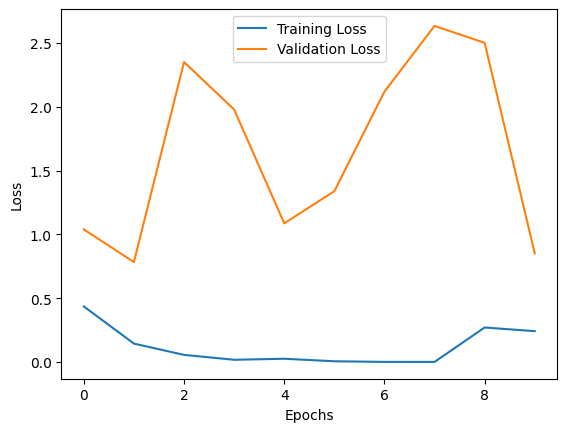

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


I thought pyplot was essential for understanding the model's learning progress and potential issues related to overfitting or underfitting. Overall the validation loss seems to be decreasing across epochs while fluctuating a bit, as there are steep peaks. This suggests potential fluctuations or difficulties in generalization to unseen data.  The training loss almost has a linear form across all the epochs while maintaining stability until the 8th epoch, but it doesnt go over 0.5 in terms of loss. This suggests that the model effectively learns from the training data without significant signs of overfitting.

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_true = []
y_pred = []

for x, y in ds_test:
    y_true.extend(y.numpy())
    y_pred.extend(np.round(model.predict(x)).flatten())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


1/1 [==============================] - 0s 403ms/step
Confusion Matrix:
[[ 97  31]
 [  0 128]]


The confusion matrix output showcases the model's classification performance by breaking down its predictions into four categories, which I thought we could see the model's succesfulness more in depth this way. The matrix here shows the model's high accuracy in correctly identifying humans (true positives) without any false negatives. On the contrary it has some misclassifications of horses as humans (false positives), which shows that there is room for improvement in accurately distinguishing horses from humans.

-----

<a id="scrollTo=aNGRuJahuk26"></a>

# Image Super-Resolution

> **NOTE:** This section of the final is **optional**. If you choose to complete it, it will contribute to both the "Model Building" and "Model Evaluation" portions of the grading rubric in addition to the image classifier you have already built. This will mean that grading is more lenient; however, you will have to do additional work. There is no penalty for choosing to not complete this section.

For this task, you will build an autoencoder that takes an image and creates a super-resolution version of that image. I.e., it _upscales_ the image to fill in more detail than was originally present.

To build this model, we will use the same dataset as in the previous example; however, with a small twist. Your training data will be images of horses and humans that have been downsampled to 150x150 pixels, and your model output will be the **exact same** images, but at the original 300x300 pixel resolution. To help get started, I have prepared a training and testing dataset of these images for you:

In [34]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(150, 150),
  tf.keras.layers.Resizing(300, 300),
  tf.keras.layers.Rescaling(1./255)
])

X_train_2 = resize_and_rescale(X_train, training=True)
X_test_2 = resize_and_rescale(X_test, training=True)

As we can see, the image on the right is the one we have downscaled and it shows an obvious loss of detail compared to the original on the left. Let's see if our supersampling autoencoder is able to clear up the image resolution!

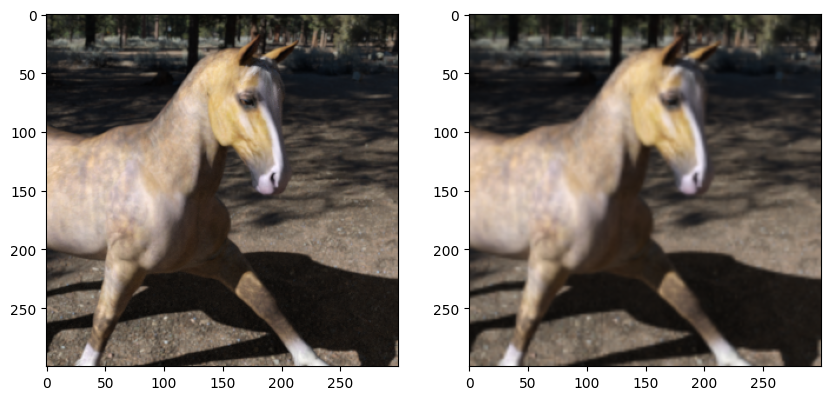

In [35]:
orig_img = next(iter(X_train))
downscaled_img = next(iter(X_train_2))

plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
plt.imshow(orig_img)

ax = plt.subplot(1, 2, 2)
plt.imshow(downscaled_img)

Finally, we will also create new y variables for our model to use as a ground truth against which to compare its predictions. These will just be the original 300x300 pixel images:

In [36]:
# Instead of "horse" or "human" labels,
# our y variable will now be the original
# 300x300 pixel images
y_train_2 = X_train
y_test_2 = X_test

You should reference our [Autoencoders Lab](https://github.com/wetherc/data-2000/blob/main/labs/11-16_autoencoders.ipynb) for guidance on how to structure your model. Importantly, remember:

  - Your model's input should have a shape that matches the input's pixel size (300x300 pixels --- remember, we downscaled the images and then stretched them back to their original dimensions);
  - Your model's output should have a shape that matches the output's pixel size (300x300 pixels);
  - Your convolutional and deconvolutional layers should be careful to evenly divide your images so that you don't have rounding issues from fractional pixels;
  - For your model's final layer, you should use TensorFlow's [UpSampling2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D) followed by one or more Convolutional2D layers

In [46]:
import tensorflow as tf
X_train_resized = tf.image.resize(X_train, (150, 150))
X_test_resized = tf.image.resize(X_test, (150, 150))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train_resized, X_train_resized, epochs=10, batch_size=32, validation_data=(X_test_resized, X_test_resized))



Epoch 1/10
33/33 [==============================] - 51s 2s/step - loss: 22452.9824 - val_loss: 53762.1172
Epoch 2/10
33/33 [==============================] - 47s 1s/step - loss: 22452.4727 - val_loss: 53762.1172
Epoch 3/10
24/33 [====================>.........] - ETA: 12s - loss: 22671.8203

KeyboardInterrupt: ignored

Model Building

Build a convolutional autoencoder to upscale the input images back to their original pixel resolution.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [48]:
encoder_input = layers.Input(shape=(150, 150, 3))
encoder_conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_pool1 = layers.MaxPooling2D((2, 2), padding='same')(encoder_conv1)
encoder = Model(encoder_input, encoder_pool1)

decoder_input = layers.Input(shape=(75, 75, 32))
decoder_conv1 = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoder_input)
decoder_upsample1 = layers.UpSampling2D((2, 2))(decoder_conv1)
decoder_output = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(decoder_upsample1)
decoder = Model(decoder_input, decoder_output)

autoencoder_input = layers.Input(shape=(150, 150, 3))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


* The encoder compresses input images into a lower-dimensional space and a decoder reconstructs the original high-resolution images from a compressed representation.
* The use of convolutional layers in both the encoder and decoder enables the model to learn hierarchical features, which I thought would be good for capturing details in images.  
* I used fucntions like ReLU and Sigmoid tp aid in learning non-linear mappings between the input and output spaces.

sorry i was too hungry to continue
